In [22]:
data,cluster = make_circles(n_samples=1000, noise=0.05, random_state=12345, factor=0.45)

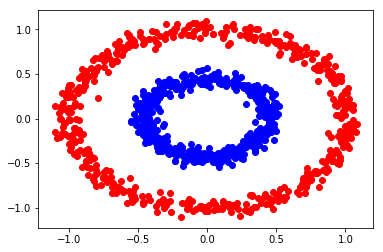

In [23]:
plt.scatter(data[cluster==0,0],data[cluster==0,1], c='red')
plt.scatter(data[cluster==1,0],data[cluster==1,1], c='blue')
plt.show()

In [26]:
from sklearn.metrics import pairwise_distances

In [27]:
D = pairwise_distances(X=data)

In [28]:
D.shape

(1000, 1000)

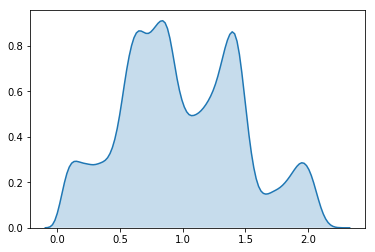

In [29]:
sns.kdeplot(D.flatten(),shade=True)    #KDE- kernal density estimator - a non-parametric way to 
# estimate the probability density function of a random variable.Kernel density estimation is a 
# fundamental data smoothing problem where inferences about the population are made, based on a 
# finite data sample.

In [30]:
from scipy.stats import kde

In [37]:
KDE = kde.gaussian_kde(D.flatten())  # gaussian_kde works for both uni-variate and multi-variate data.

In [40]:
KDE(np.linspace(0.0,0.2,num=50)).max()  # linspace returns evenly spaced numbers over a specified interval.
#  linspace returns num evenly spaced samples, calculated over the interval [start, stop].
# KDE - It is a technique to estimate the unknown probability distribution of a random variable, 
# based on a sample of points taken from that distribution. We are estimating the probability
# density function of the variable, and we use kernels to do this, hence the name.
# later calculating the max value of the KDE 

0.2937682888391283

In [41]:
np.linspace(0.0,0.2,num=50)[KDE(np.linspace(0.0,0.2,num=50))==KDE(np.linspace(0.0,0.2,num=50)).max()]

array([0.14285714])

In [42]:
eps = 0.143

In [46]:
pts = (D<=0.143).sum(axis=0)

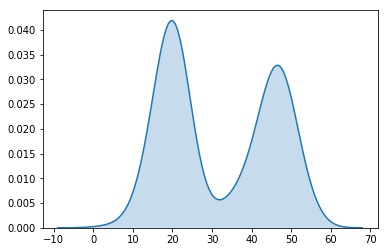

In [49]:
sns.kdeplot(pts, shade=True)

(array([ 1.,  1.,  0.,  0.,  3.,  1.,  0.,  2.,  5.,  7., 30., 16., 35.,
        33., 48., 59., 70., 74., 52., 29., 41.,  6.,  3.,  5.,  1.,  1.,
         3.,  3.,  7.,  6., 13.,  7.,  8., 15., 13., 12., 22., 32., 31.,
        38., 93., 48., 38., 33., 17., 11., 12.,  5.,  7.,  3.]),
 array([ 2. ,  3.1,  4.2,  5.3,  6.4,  7.5,  8.6,  9.7, 10.8, 11.9, 13. ,
        14.1, 15.2, 16.3, 17.4, 18.5, 19.6, 20.7, 21.8, 22.9, 24. , 25.1,
        26.2, 27.3, 28.4, 29.5, 30.6, 31.7, 32.8, 33.9, 35. , 36.1, 37.2,
        38.3, 39.4, 40.5, 41.6, 42.7, 43.8, 44.9, 46. , 47.1, 48.2, 49.3,
        50.4, 51.5, 52.6, 53.7, 54.8, 55.9, 57. ]),
 <a list of 50 Patch objects>)

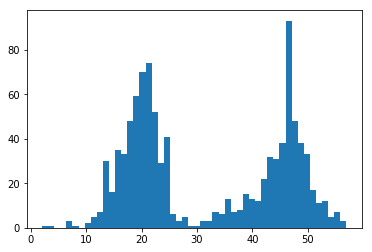

In [51]:
plt.hist(x=pts,bins=50)

In [52]:
MinPts = 10

In [53]:
dbs = DBSCAN(eps=eps,min_samples=MinPts,n_jobs=-1) #with n_jobs=1 it uses 100% of the cpu of 
# one of the cores. Each process takes the 100% usage of a given core, if n_jobs = -1

In [54]:
C = dbs.fit_predict(X=data)

array([0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1,

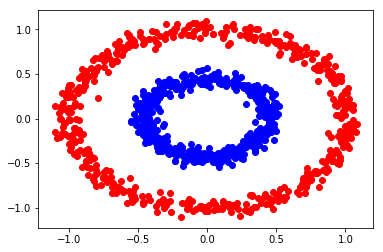

In [56]:
plt.scatter(data[C==0,0],data[C==0,1], c='red')
plt.scatter(data[C==1,0],data[C==1,1], c='blue')
plt.show()